In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
X = np.arange(-3,3,0.01)
def sigmoid(x: float) -> float:
    return 1/(1+np.exp(-x))

def square(x: float) -> float:
    return x*x

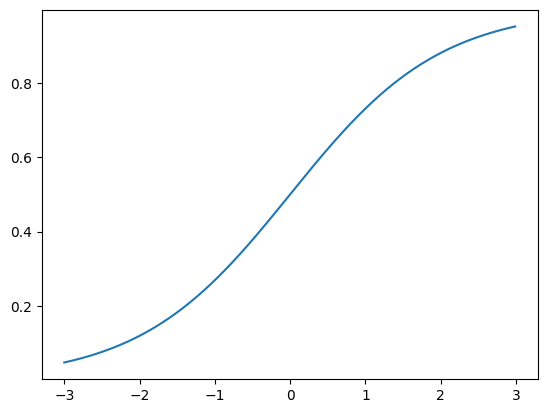

In [79]:
plt.plot(X,sigmoid(X))
plt.show()

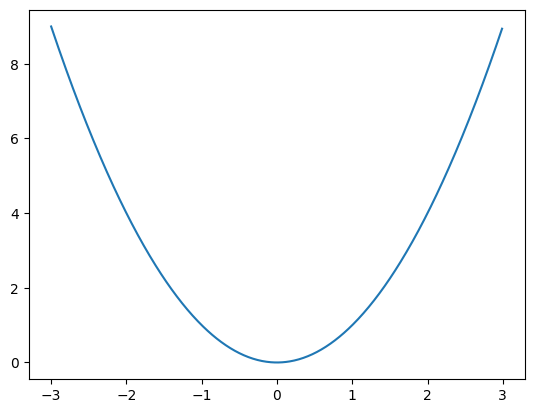

In [80]:
plt.plot(X,square(X))
plt.show()

In [81]:
from typing import List
from typing import Callable

Array_Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain, x: np.ndarray) -> np.ndarray:
    assert len(chain) == 2

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

def deriv(func: Array_Function,
          input_: np.ndarray,
          delta: float = 0.001) -> np.ndarray:
    return (func(input_ + delta) - func(input_ - delta))/ (2*delta)

def chain_deriv_2(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    assert len(chain) == 2

    assert input_range.ndim == 1

    f1 = chain[0]
    f2 = chain[1]

    # x -> f1(x) ->
    # df2/df1 <- df1/dx <-
    # f1(x)
    f1x = f1(input_range)

    # df1/dx
    df1dx = deriv(f1, input_range)

    # df2/df1
    df2df1 = deriv(f2, f1x)

    return df2df1*df1dx

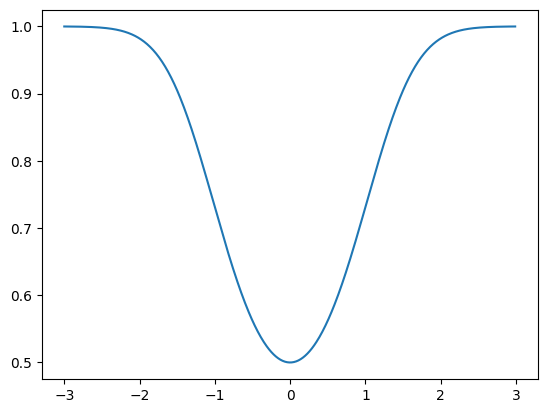

In [82]:
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

calchain_1 = chain_length_2(chain_1, X)

plt.plot(X, calchain_1)
plt.show()

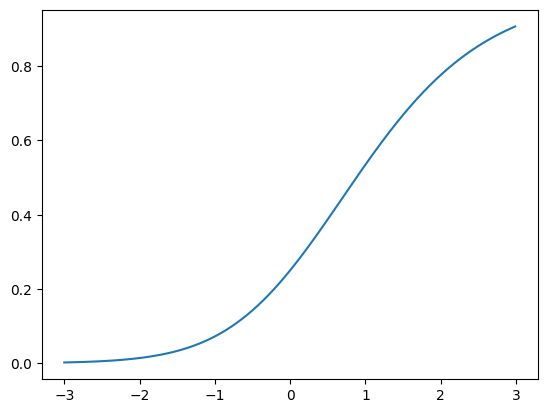

In [83]:
calchain_2 = chain_length_2(chain_2, X)
plt.plot(X, calchain_2)

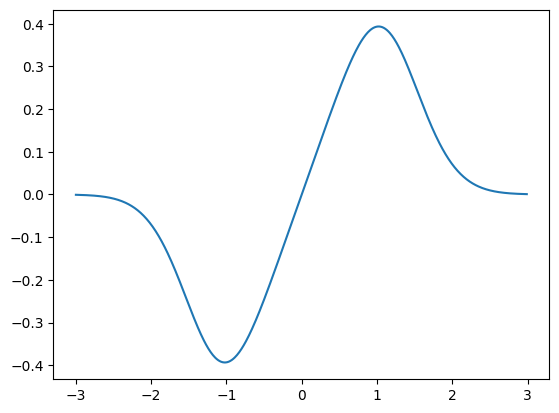

In [84]:
calderiv_1 = chain_deriv_2(chain_1, X)
plt.plot(X, calderiv_1)

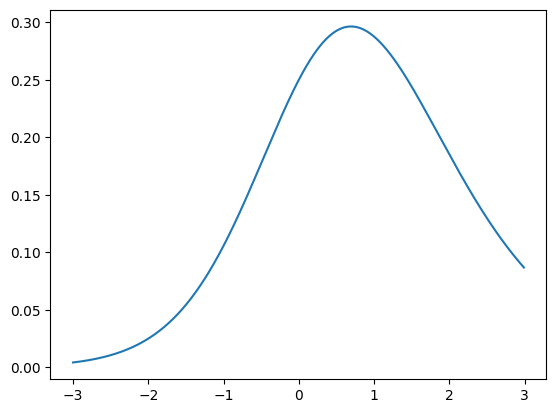

In [85]:
calderiv_2 = chain_deriv_2(chain_2, X)
plt.plot(X, calderiv_2)

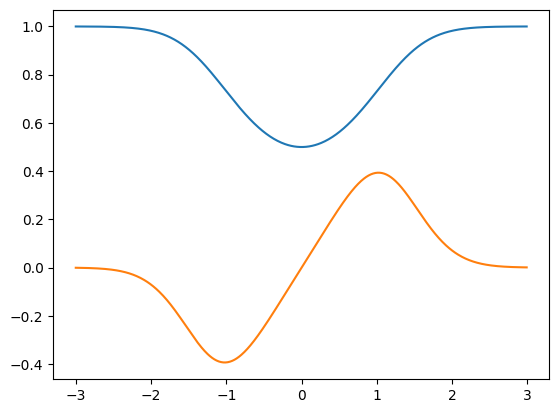

In [86]:
plt.plot(X, calchain_1)
plt.plot(X, calderiv_1)

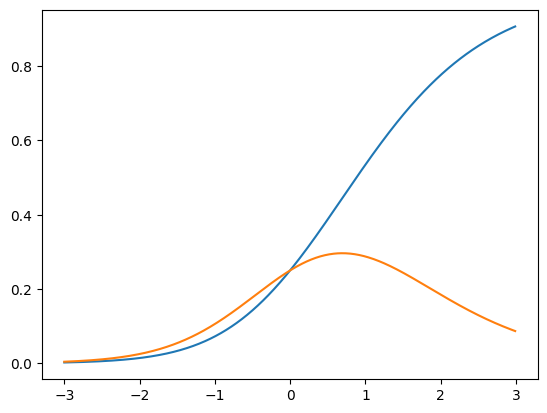

In [87]:
plt.plot(X, calchain_2)
plt.plot(X, calderiv_2)

In [88]:
def leaky_relu(x: float) -> float:
    out = np.copy(x)
    for i in range(0,len(x) - 1):
        if out[i] > 0:
            out[i] = out[i]
        else:
            out[i] = 0.01*out[i]
    return out

def chain_length_3(chain: Chain, x: np.ndarray) -> np.ndarray:
    assert len(chain) == 3

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [89]:
def chain_deriv_3(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''
    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    # f1(x)
    f1_of_x = f1(input_range) # f2(f1(x))
    f2_of_x = f2(f1_of_x) # df3du
    df3df2f1 = deriv(f3, f2_of_x) # df2du
    df2df1 = deriv(f2, f1_of_x) # df1dx
    df1dx = deriv(f1, input_range)
    # Multiplying these quantities together at each point
    return df1dx * df2df1 * df3df2f1

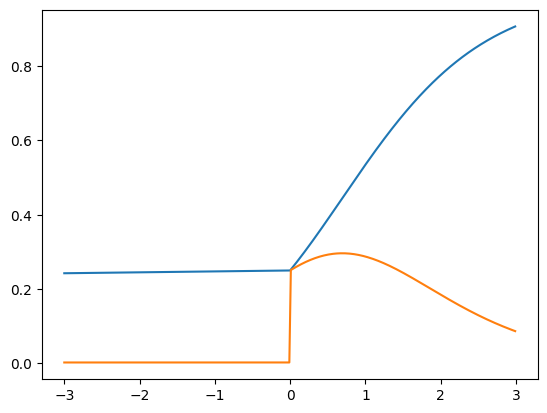

In [90]:
calchain3 = chain_length_3([leaky_relu, sigmoid, square], X)
calchainderiv3 = chain_deriv_3([leaky_relu, sigmoid, square], X)
plt.plot(X, calchain3)
plt.plot(X, calchainderiv3)